In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

%config InlineBackend.figure_format = 'svg'

In [2]:
DATA_DIR = '../../datasets/tokenized'

df = pd.read_csv(f'{DATA_DIR}/blog_authorship_tokenized_pos_punct_final.csv')
df.sample(5)

,text,gender,horoscope,job,age_group,tokenized,pos,total_punct,punct_dist,count_punct
149997,Okay that is sweet . Now you can change the fo...,male,Gemini,Fashion,>35,okay that is sweet . now you can change the fo...,INTJ DET AUX ADJ PUNCT ADV PRON AUX VERB DET N...,25,0.029138,"{'!': 3, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."
249353,The cover of today's Charlotte Observer featur...,male,Aquarius,Religion,>35,the cover of today 's charlotte observer featu...,DET NOUN ADP NOUN PART PROPN PROPN VERB DET NO...,34,0.028692,"{'!': 0, '""': 4, '#': 0, '$': 0, '%': 0, '&': ..."
37226,I was at the gym when the lights went out yest...,male,Leo,indUnk,>35,i was at the gym when the lights went out yest...,PRON AUX ADP DET NOUN SCONJ DET NOUN VERB ADP ...,184,0.037112,"{'!': 3, '""': 2, '#': 0, '$': 1, '%': 0, '&': ..."
376875,Thats the way my ended yesterday and started t...,female,Gemini,BusinessServices,25-34,that s the way my ended yesterday and started ...,DET VERB DET NOUN PRON VERB NOUN CCONJ VERB NO...,37,0.034387,"{'!': 7, '""': 2, '#': 0, '$': 0, '%': 0, '&': ..."
357617,"Hey people, what's up? I'm just sitting here w...",male,Virgo,Student,<18,"hey people , what 's up ? i 'm just sitting he...",INTJ NOUN PUNCT PRON AUX ADP PUNCT PRON AUX AD...,119,0.054165,"{'!': 3, '""': 4, '#': 0, '$': 0, '%': 0, '&': ..."


In [3]:
df['job'].value_counts(dropna=False)

indUnk                     233110
Student                    143383
Technology                  41806
Arts                        30690
Education                   27707
Communications-Media        18313
Internet                    15233
Non-Profit                  13602
Engineering                 10864
Law                          8445
Publishing                   7346
Science                      6643
Government                   6205
Consulting                   5248
Religion                     4845
Advertising                  4498
Fashion                      4343
Marketing                    4207
BusinessServices             4025
Banking                      3610
Accounting                   3552
Military                     3468
Telecommunications           3447
Chemicals                    3305
Museums-Libraries            2942
Sports-Recreation            2785
HumanResources               2716
RealEstate                   2710
Transportation               2196
Biotech       

In [4]:
df_ = (
    df.copy()
    .drop(
        df[df['job'].isin(
            ['indUnk', 'Environment', 'Maritime']
        )].index
    )
    .reset_index()
)

df_['job'].value_counts()

Student                    143383
Technology                  41806
Arts                        30690
Education                   27707
Communications-Media        18313
Internet                    15233
Non-Profit                  13602
Engineering                 10864
Law                          8445
Publishing                   7346
Science                      6643
Government                   6205
Consulting                   5248
Religion                     4845
Advertising                  4498
Fashion                      4343
Marketing                    4207
BusinessServices             4025
Banking                      3610
Accounting                   3552
Military                     3468
Telecommunications           3447
Chemicals                    3305
Museums-Libraries            2942
Sports-Recreation            2785
HumanResources               2716
RealEstate                   2710
Transportation               2196
Biotech                      2129
Manufacturing 

In [5]:
df_ = df_.groupby('job').sample(1000, random_state=97)
df_.groupby('job').count()

,index,text,gender,horoscope,age_group,tokenized,pos,total_punct,punct_dist,count_punct
job,,,,,,,,,,
Accounting,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Advertising,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Agriculture,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Architecture,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Arts,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Automotive,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Banking,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Biotech,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
BusinessServices,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [6]:
enc = LabelEncoder()
enc.fit(df_['job'])
encoded_labels = dict(zip(enc.classes_, enc.transform(enc.classes_))) # will use that in the cm later
df_['job'] = enc.transform(df_['job'])
encoded_labels

{'Accounting': 0,
 'Advertising': 1,
 'Agriculture': 2,
 'Architecture': 3,
 'Arts': 4,
 'Automotive': 5,
 'Banking': 6,
 'Biotech': 7,
 'BusinessServices': 8,
 'Chemicals': 9,
 'Communications-Media': 10,
 'Construction': 11,
 'Consulting': 12,
 'Education': 13,
 'Engineering': 14,
 'Fashion': 15,
 'Government': 16,
 'HumanResources': 17,
 'Internet': 18,
 'InvestmentBanking': 19,
 'Law': 20,
 'LawEnforcement-Security': 21,
 'Manufacturing': 22,
 'Marketing': 23,
 'Military': 24,
 'Museums-Libraries': 25,
 'Non-Profit': 26,
 'Publishing': 27,
 'RealEstate': 28,
 'Religion': 29,
 'Science': 30,
 'Sports-Recreation': 31,
 'Student': 32,
 'Technology': 33,
 'Telecommunications': 34,
 'Tourism': 35,
 'Transportation': 36}

In [7]:
X = df_['text']
y = df_['job']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29600,), (7400,), (29600,), (7400,))

In [8]:
vect = TfidfVectorizer()
svm = LinearSVC()

pipe = make_pipeline(vect, svm)

In [9]:
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1)],
    'linearsvc__random_state': [97],
}

In [10]:
gs = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1, refit=True, verbose=5)

gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
{'linearsvc__random_state': 97, 'tfidfvectorizer__ngram_range': (1, 1)}


In [11]:
y_pred = gs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.46      0.43       206
           1       0.26      0.23      0.24       214
           2       0.36      0.43      0.39       201
           3       0.31      0.37      0.34       191
           4       0.13      0.12      0.12       197
           5       0.26      0.30      0.28       217
           6       0.18      0.17      0.17       202
           7       0.30      0.32      0.31       187
           8       0.27      0.23      0.25       198
           9       0.20      0.22      0.21       188
          10       0.10      0.09      0.09       198
          11       0.26      0.28      0.27       197
          12       0.22      0.17      0.19       213
          13       0.08      0.06      0.07       216
          14       0.20      0.17      0.19       193
          15       0.50      0.50      0.50       199
          16       0.22      0.16      0.19       221
          17       0.31    

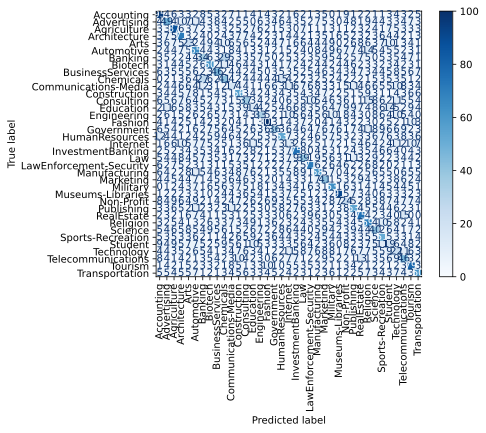

In [12]:
cm = confusion_matrix(y_test, y_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.display_labels = encoded_labels
disp.plot(cmap='Blues', xticks_rotation=90);

### Subset of `job`

In [13]:
jobs = df['job'].value_counts()[df['job'].value_counts() >= 10_000].index.tolist()
jobs.remove('indUnk')
jobs

['Student',
 'Technology',
 'Arts',
 'Education',
 'Communications-Media',
 'Internet',
 'Non-Profit',
 'Engineering']

In [14]:
df_ = df[df['job'].isin(jobs)].reset_index()
df_['job'].value_counts()

Student                 143383
Technology               41806
Arts                     30690
Education                27707
Communications-Media     18313
Internet                 15233
Non-Profit               13602
Engineering              10864
Name: job, dtype: int64

In [15]:
df_ = df_.groupby('job').sample(1000, random_state=97)
df_.groupby('job').count()

,index,text,gender,horoscope,age_group,tokenized,pos,total_punct,punct_dist,count_punct
job,,,,,,,,,,
Arts,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Communications-Media,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Education,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Engineering,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Internet,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Non-Profit,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Student,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Technology,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [16]:
enc = LabelEncoder()
enc.fit(df_['job'])
encoded_labels = dict(zip(enc.classes_, enc.transform(enc.classes_))) # will use that in the cm later
df_['job'] = enc.transform(df_['job'])
encoded_labels

{'Arts': 0,
 'Communications-Media': 1,
 'Education': 2,
 'Engineering': 3,
 'Internet': 4,
 'Non-Profit': 5,
 'Student': 6,
 'Technology': 7}

In [17]:
X = df_['text']
y = df_['job']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6400,), (1600,), (6400,), (1600,))

In [18]:
vect = TfidfVectorizer()
svm = LinearSVC()

pipe = make_pipeline(vect, svm)

In [19]:
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1)],
    'linearsvc__random_state': [97],
}

In [20]:
gs = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1, refit=True, verbose=5)

gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
{'linearsvc__random_state': 97, 'tfidfvectorizer__ngram_range': (1, 1)}


In [21]:
y_pred = gs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.24      0.24       190
           1       0.30      0.29      0.30       209
           2       0.21      0.22      0.22       197
           3       0.23      0.21      0.22       196
           4       0.24      0.27      0.25       199
           5       0.28      0.25      0.27       201
           6       0.30      0.32      0.31       202
           7       0.22      0.23      0.23       206

    accuracy                           0.25      1600
   macro avg       0.25      0.25      0.25      1600
weighted avg       0.25      0.25      0.25      1600



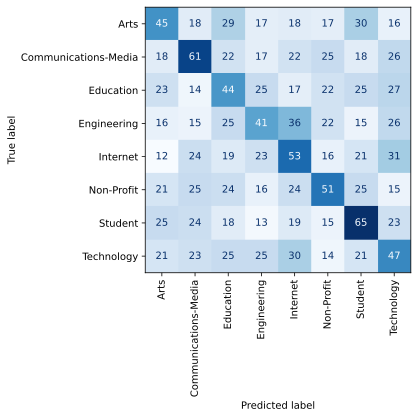

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.display_labels = encoded_labels
disp.plot(cmap='Blues', xticks_rotation=90, colorbar=False);

## Add *n*-gram features

In [23]:
from tempfile import mkdtemp
from shutil import rmtree

In [24]:
cache_dir = mkdtemp()

pipe = Pipeline(
    [
        ('vect', TfidfVectorizer()),
        ('clf', LinearSVC(random_state=97))
    ],
    memory=cache_dir
)

In [25]:
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__analyzer': ['word', 'char'],
}

In [26]:
gs = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1, refit=True, verbose=5)

gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


c:\Users\dimboump\workspace\clips-internship\venv\lib\site-packages\sklearn\pipeline.py:336: UserWarning: Persisting input arguments took 3.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


{'vect__analyzer': 'word', 'vect__ngram_range': (1, 2)}


In [27]:
y_pred = gs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25       190
           1       0.29      0.30      0.30       209
           2       0.20      0.23      0.22       197
           3       0.23      0.19      0.21       196
           4       0.27      0.27      0.27       199
           5       0.29      0.26      0.28       201
           6       0.30      0.38      0.33       202
           7       0.27      0.22      0.24       206

    accuracy                           0.26      1600
   macro avg       0.26      0.26      0.26      1600
weighted avg       0.26      0.26      0.26      1600



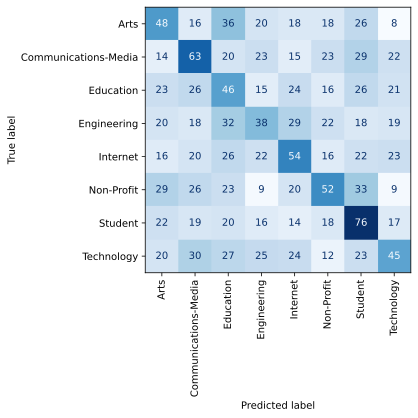

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.display_labels = encoded_labels
disp.plot(cmap='Blues', xticks_rotation=90, colorbar=False);

In [29]:
import joblib

joblib.dump(gs, 'job_ngram.joblib')

['job_ngram.joblib']

In [30]:
rmtree(cache_dir)

### Add PoS and punctuation features

In [31]:
X = df_.drop('job', axis=1)
y = df_['job']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6400, 10), (1600, 10), (6400,), (1600,))

In [32]:
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


class RowIterator(TransformerMixin):
    """ Prepare Series for DictVectorizer """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        from ast import literal_eval
        return X.apply(literal_eval)

In [33]:
from sklearn.pipeline import make_pipeline

word_pipe = Pipeline([
    ('selector', ItemSelector(key='text')),
    ('vect', TfidfVectorizer(analyzer='word'))
])

pos_pipe = Pipeline([
    ('selector', ItemSelector(key='pos')),
    ('vect', TfidfVectorizer(analyzer='word'))
])
   
num_pipe = Pipeline([
    ('selector', ItemSelector(key=['total_punct', 'punct_dist']))
])

punct_pipe = Pipeline([
    ('selector', ItemSelector(key='count_punct')),
    ('iter', RowIterator()),
    ('vect', DictVectorizer())
])

pipe = Pipeline([
    ('feats', FeatureUnion([  
            ('word', word_pipe),
            ('pos', pos_pipe),
            ('num', num_pipe),
            ('punct', punct_pipe)
        ],
    )),
    ('clf', LinearSVC(random_state=97, class_weight='balanced'))
])

In [34]:
param_grid = {
    'feats__word__vect__ngram_range': [(1, 2), (1, 3)],
    'feats__pos__vect__ngram_range': [(1, 2), (1, 3)],
    'clf__C': [10**x for x in range(-3, 1)],
}

In [35]:
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, refit=True, verbose=5)
 
gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'clf__C': 0.1, 'feats__pos__vect__ngram_range': (1, 2), 'feats__word__vect__ngram_range': (1, 2)}


c:\Users\dimboump\workspace\clips-internship\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [36]:
y_pred = gs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.32      0.26       190
           1       0.28      0.27      0.28       209
           2       0.26      0.10      0.15       197
           3       0.23      0.23      0.23       196
           4       0.22      0.24      0.23       199
           5       0.23      0.24      0.23       201
           6       0.30      0.24      0.27       202
           7       0.21      0.27      0.24       206

    accuracy                           0.24      1600
   macro avg       0.24      0.24      0.24      1600
weighted avg       0.24      0.24      0.24      1600



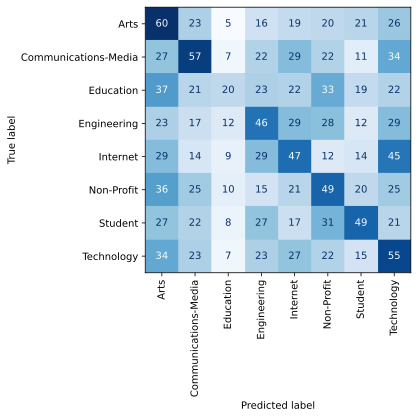

In [37]:
cm = confusion_matrix(y_test, y_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.display_labels = encoded_labels
disp.plot(cmap='Blues', xticks_rotation=90, colorbar=False);

In [38]:
import joblib

joblib.dump(gs, 'job_punct.joblib')

['job_punct.joblib']

## LIWC features

In [ ]:
from __future__ import division
from __future__ import print_function

import re

from codecs import open
from collections import Counter


class DictFeaturizer(object):
    def __init__(self, dictionary, relative=True):
        self.dict = {}
        self.rel = relative
        matcher = re.compile(r'([\*\+])')

        for key, words in dictionary.items():

            normal = {x for x in words if not matcher.findall(x)}
            regexstring = "|".join([matcher.sub(r'\\w\1', x)
                                    for x in words if x not in normal])

            if regexstring:
                wildcards = re.compile(regexstring)
            else:
                wildcards = None

            self.dict[key] = (normal, wildcards)

    def transform(self, tokens):
        # Make frequency dictionary of the text to diminish number
        # of runs in further for loop
        freq_dict = Counter(tokens)
        features = dict()

        for key, wordlists in self.dict.items():

            normal, wildcards = wordlists

            keys = set(freq_dict.keys())

            features[key] = sum([freq_dict[k] for k in normal & keys])
            if wildcards:
                features[key] += sum([freq_dict[k] for k in keys - normal
                                      if wildcards.match(k)])

        if self.rel:
            return {k: v / len(tokens) for k, v in features.items()}
        else:
            return features

    @staticmethod
    def load(path, relative=True):
        d = {}
        with open(path, "r", encoding='utf-8') as f:
            for line in f:
                line = line.lower().strip().split(",")
                key, words = line[0], set(line[1:])
                d[key] = words

        return DictFeaturizer(d, relative=relative)


In [ ]:
liwc = DictFeaturizer.load("../../datasets/LIWC/LIWC_English.csv")

In [ ]:
sample_df = df_.assign(liwc=df_['tokenized'].apply(liwc.transform))
sample_df

,text,gender,horoscope,job,age_group,tokenized,pos,total_punct,punct_dist,count_punct,liwc
496856,"Today, I woke up feeling great, rested.... As ...",female,Virgo,Education,18-24,"today , i woke up feeling great , rested .... ...",NOUN PUNCT PRON VERB ADP VERB ADJ PUNCT VERB P...,22,0.049217,"{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...","{'funct': 0.11038961038961038, 'pronoun': 0.04..."
244766,"So, I came to Toledo this weekend. Didn't do m...",female,Cancer,Engineering,18-24,"so , i came to toledo this weekend . did n't d...",ADV PUNCT PRON VERB ADP PROPN DET NOUN PUNCT A...,75,0.039124,"{'!': 0, '""': 4, '#': 0, '$': 0, '%': 0, '&': ...","{'funct': 0.11430010070493454, 'pronoun': 0.05..."
581356,"Saturday December 7, 2002 OK, this is totally ...",female,Libra,indUnk,18-24,"saturday december 7 , 2002 ok , this is totall...",PROPN PROPN NUM PUNCT NUM INTJ PUNCT DET AUX A...,30,0.039526,"{'!': 1, '""': 2, '#': 0, '$': 0, '%': 0, '&': ...","{'funct': 0.10406091370558376, 'pronoun': 0.05..."
311881,Planning to finish this before my laptop boots...,male,Virgo,indUnk,18-24,planning to finish this before my laptop boots...,NOUN PART VERB DET ADP PRON NOUN VERB ADP PUNC...,45,0.039199,"{'!': 0, '""': 2, '#': 0, '$': 0, '%': 0, '&': ...","{'funct': 0.11382799325463744, 'pronoun': 0.06..."
590886,One of my biggest pet peeves is being told to ...,female,Scorpio,indUnk,18-24,one of my biggest pet peeves is being told to ...,NUM ADP PRON ADJ ADJ NOUN AUX AUX VERB PART VE...,102,0.047530,"{'!': 2, '""': 10, '#': 0, '$': 0, '%': 0, '&':...","{'funct': 0.11830357142857142, 'pronoun': 0.05..."
...,...,...,...,...,...,...,...,...,...,...,...
285242,My father was particularly interested in writi...,male,Cancer,Internet,>35,my father was particularly interested in writi...,PRON NOUN AUX ADV ADJ ADP VERB PUNCT PRON VERB...,48,0.020262,"{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...","{'funct': 0.12334437086092716, 'pronoun': 0.05..."
426297,"retrograde (by deav) Rio, Jan 2004 (exposed) i...",female,Virgo,indUnk,>35,"retrograde ( by deav ) rio , jan 2004 ( expose...",PROPN PUNCT ADP PROPN PUNCT PROPN PUNCT PROPN ...,17,0.034068,"{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...","{'funct': 0.1145631067961165, 'pronoun': 0.075..."
297468,Today we met up with the Bay Area S2k user gro...,female,Gemini,indUnk,>35,today we met up with the bay area s2k user gro...,NOUN PRON VERB ADP ADP DET PROPN PROPN PROPN N...,25,0.023652,"{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...","{'funct': 0.10249307479224377, 'pronoun': 0.04..."
63823,"Ok- before I reply, I have to vent a little- I...",female,Scorpio,indUnk,>35,"ok- before i reply , i have to vent a little- ...",INTJ ADP PRON VERB PUNCT PRON AUX PART VERB DE...,137,0.055020,"{'!': 7, '""': 10, '#': 0, '$': 0, '%': 0, '&':...","{'funct': 0.1130030959752322, 'pronoun': 0.053..."


In [ ]:
liwc_df = sample_df['liwc'].apply(pd.Series).fillna(0).add_prefix('liwc_')
sample_df = pd.concat([sample_df, liwc_df], axis=1).drop(['text', 'liwc'], axis=1)
sample_df.shape

(100000, 73)

In [ ]:
word_pipe = Pipeline([
    ('selector', ItemSelector(key='tokenized')),
    ('vect', TfidfVectorizer(analyzer='word'))
])

pos_pipe = Pipeline([
    ('selector', ItemSelector(key='pos')),
    ('vect', TfidfVectorizer(analyzer='word'))
])

num_cols = ['total_punct', 'punct_dist'] + [col for col in X.columns
                                            if col.startswith('liwc_')]

num_pipe = Pipeline([
    ('selector', ItemSelector(key=num_cols)),
])

punct_pipe = Pipeline([
    ('selector', ItemSelector(key='count_punct')),
    ('iter', RowIterator()),
    ('vect', DictVectorizer())
])

pipe = Pipeline([(
        'feats', 
        FeatureUnion([  
            ('word', word_pipe),
            ('pos', pos_pipe),
            ('num', num_pipe),
            ('punct', punct_pipe)
        ],
    )),
    ('clf', LinearSVC(random_state=97, class_weight='balanced'))
])

In [ ]:
param_grid = {
    'feats__word__vect__ngram_range': [(1, 2), (1, 3)],
    'feats__pos__vect__ngram_range': [(1, 2), (1, 3)],
    'clf__C': [10**x for x in range(-3, 1)],
}

In [ ]:
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, refit=True, verbose=5)

gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'clf__C': 0.1, 'feats__pos__vect__ngram_range': (1, 3), 'feats__word__vect__ngram_range': (1, 2)}


c:\Users\dimboump\workspace\clips-internship\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
y_pred = gs.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.19      0.26      4987
           1       0.33      0.63      0.43      5021
           2       0.68      0.63      0.65      4949
           3       0.55      0.35      0.43      5043

    accuracy                           0.45     20000
   macro avg       0.49      0.45      0.44     20000
weighted avg       0.49      0.45      0.44     20000



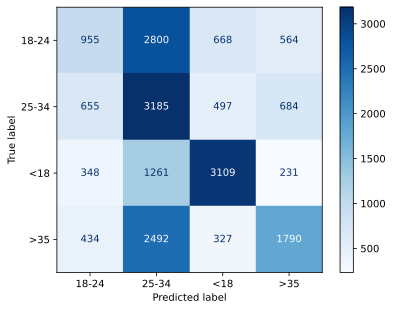

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.display_labels = encoded_labels
disp.plot(cmap='Blues', xticks_rotation=90, colorbar=False);

In [ ]:
joblib.dump(gs, 'job_liwc.joblib')

['age_liwc.joblib']